In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_raw = pd.read_csv("../data/raw/aqi_raw.csv")
df_raw["timestamp"] = pd.to_datetime(df_raw["timestamp"], format="mixed")


df_raw.head()


,city,timestamp,aqi,pm25,pm10,temperature,humidity,wind_speed
0,Lahore,2025-12-10 11:00:51.628892,189,117.201212,87.007330,34.303980,43.294236,4.006786
1,Lahore,2025-12-10 11:06:19.542340,84,62.233272,57.733103,34.793254,66.609765,4.742340
2,Lahore,2025-12-10 11:06:22.330617,84,91.048621,69.933051,28.375758,64.564810,1.822739
3,Lahore,2025-12-10 11:06:23.669550,157,43.695611,124.519234,15.382691,89.526821,5.212014
4,Lahore,2025-12-10 11:06:24.744203,150,91.509978,106.565457,28.666585,72.832496,3.200232


In [15]:
df_raw.info()
df_raw.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         79 non-null     object        
 1   timestamp    79 non-null     datetime64[ns]
 2   aqi          79 non-null     int64         
 3   pm25         79 non-null     float64       
 4   pm10         79 non-null     float64       
 5   temperature  78 non-null     float64       
 6   humidity     78 non-null     float64       
 7   wind_speed   78 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 5.1+ KB


,timestamp,aqi,pm25,pm10,temperature,humidity,wind_speed
count,79,79.000000,79.000000,79.000000,78.000000,78.000000,78.000000
mean,2025-12-10 11:07:52.945601280,137.481013,75.956772,113.678019,27.581741,61.695731,3.622717
min,2025-12-10 11:00:51.628892,5.000000,20.539312,41.656627,15.233727,35.040451,1.021960
25%,2025-12-10 11:06:37.892641024,108.000000,49.447154,70.847458,21.028507,46.267003,2.546667
50%,2025-12-10 11:08:45.322691072,137.000000,76.438206,110.593867,28.836686,60.566543,3.730113
75%,2025-12-10 11:09:00.498061568,167.000000,102.547294,136.971496,33.929853,75.527822,4.603306
max,2025-12-10 11:18:47,199.000000,275.240000,494.670000,39.781586,89.787260,5.949231
std,NaN,37.427832,38.317801,58.800720,7.114739,17.230136,1.353173


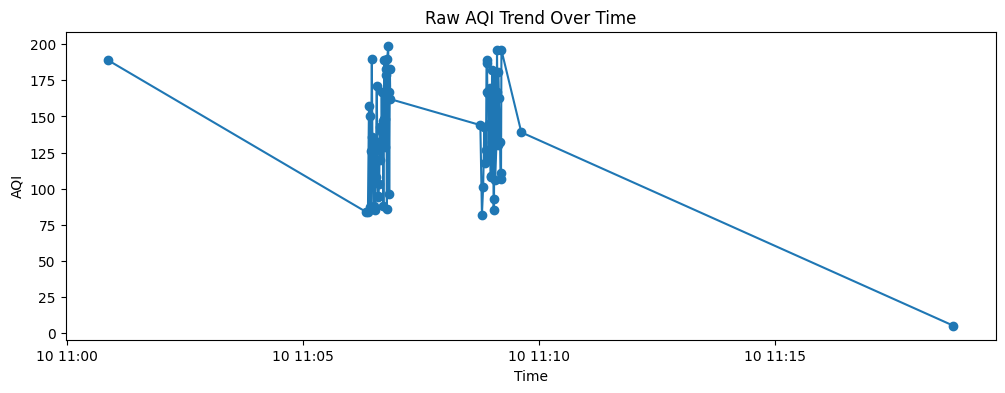

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(df_raw["timestamp"], df_raw["aqi"], marker="o")
plt.title("Raw AQI Trend Over Time")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.show()


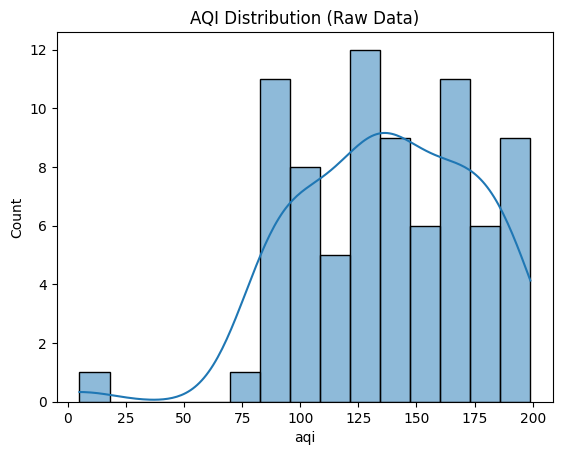

In [18]:
sns.histplot(df_raw["aqi"], bins=15, kde=True)
plt.title("AQI Distribution (Raw Data)")
plt.show()


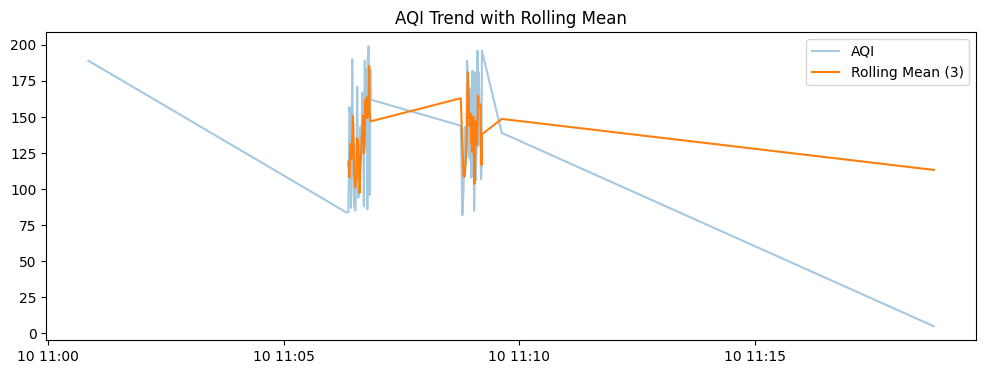

In [19]:
df_raw["aqi_rolling_mean"] = df_raw["aqi"].rolling(3).mean()

plt.figure(figsize=(12, 4))
plt.plot(df_raw["timestamp"], df_raw["aqi"], alpha=0.4, label="AQI")
plt.plot(df_raw["timestamp"], df_raw["aqi_rolling_mean"], label="Rolling Mean (3)")
plt.title("AQI Trend with Rolling Mean")
plt.legend()
plt.show()


/Users/muhammadsaim/mlops_finance_project/venv/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/muhammadsaim/mlops_finance_project/venv/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


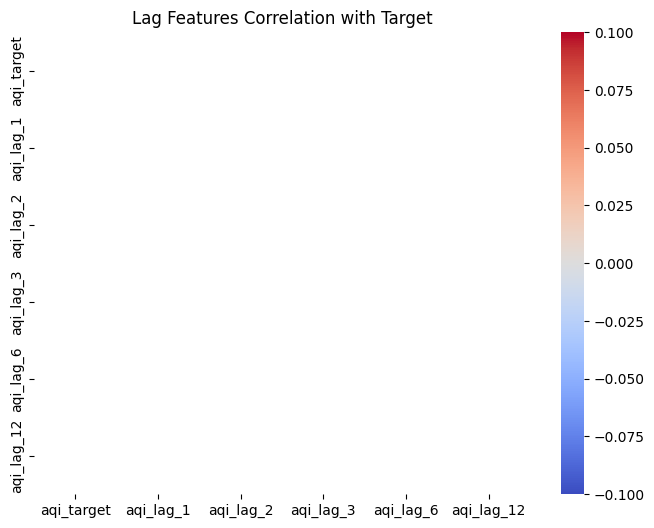

In [11]:
lag_cols = [c for c in df.columns if "lag" in c]

corr = df[["aqi_target"] + lag_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Lag Features Correlation with Target")
plt.show()


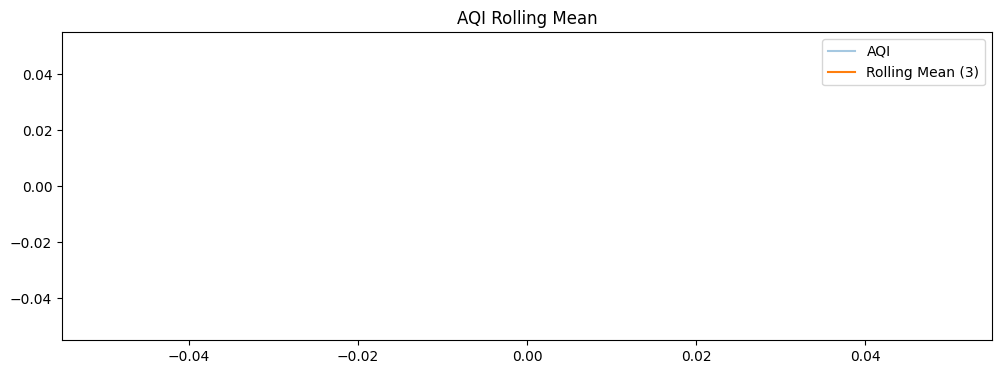

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(df["timestamp"], df["aqi"], alpha=0.4, label="AQI")
plt.plot(df["timestamp"], df["aqi_rolling_mean_3"], label="Rolling Mean (3)")
plt.title("AQI Rolling Mean")
plt.legend()
plt.show()
